# Wine quality predictor

This model will predict the quality of a given wine, based on the provided features. We use the wine dataset provided by the UC Irvine Machine Learning Repository.

The dataset provides the following features:
- fixed_acidity
- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density
- pH
- sulphates
- alcohol

The target is *quality* which is a value between 1 and 10.

It also has a feature color, which denotes if it is a red or white wine.

We will start by loading the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv("./resources/winequality-red.csv", sep=";")
white_wine = pd.read_csv("./resources/winequality-white.csv", sep=";")

white_wine.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Now that we have loaded the dataset we can inspect the data, we'll start by see if its missing any data

In [3]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
white_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

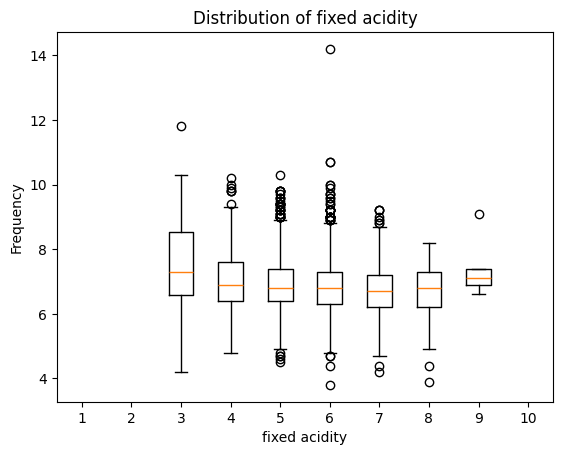

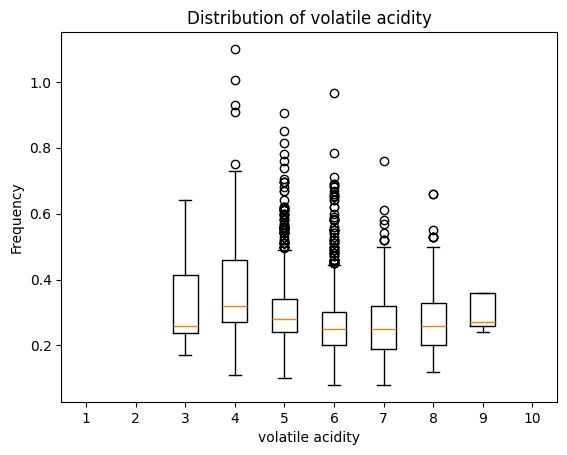

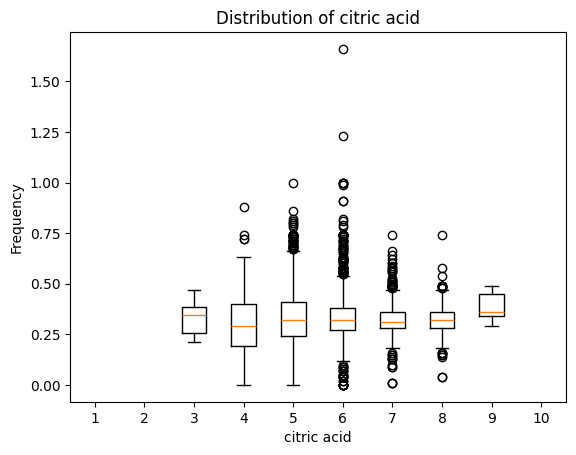

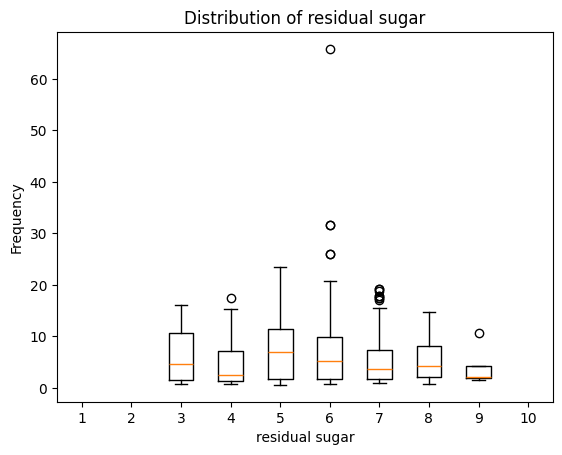

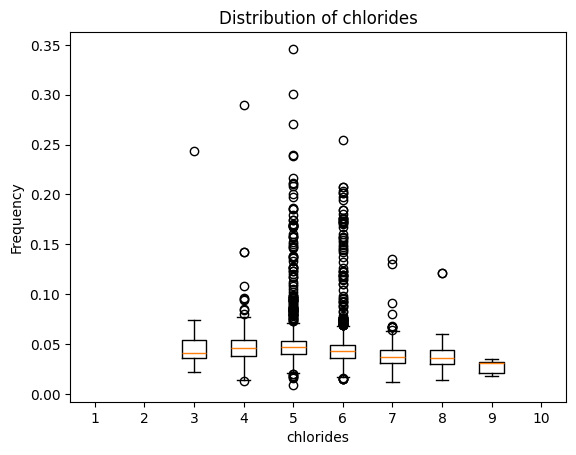

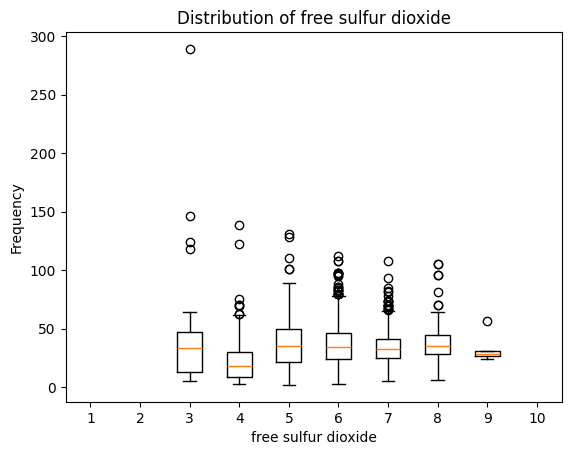

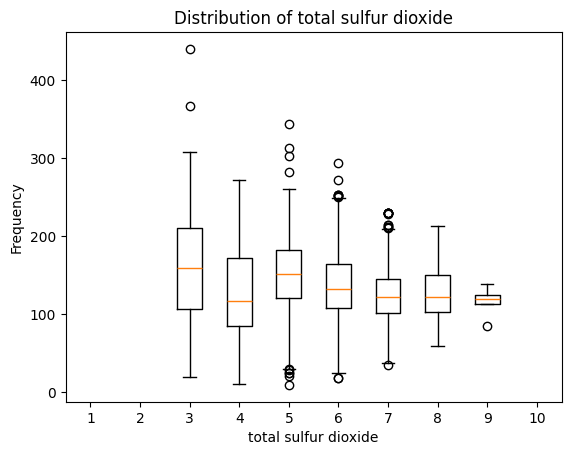

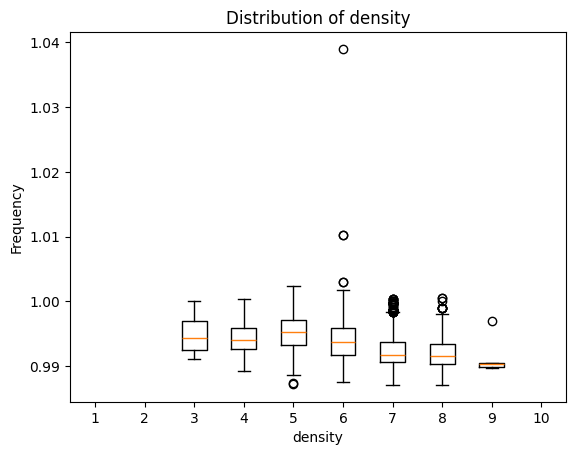

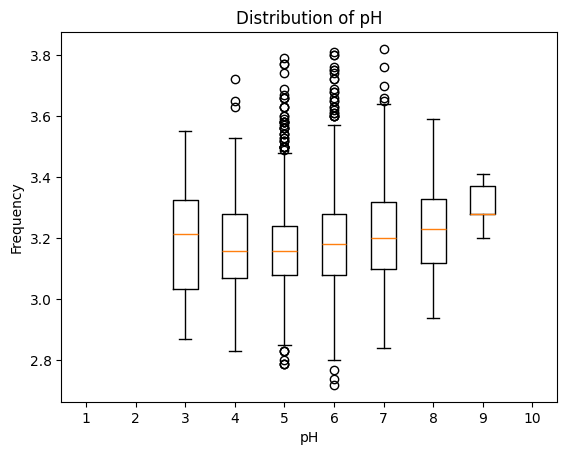

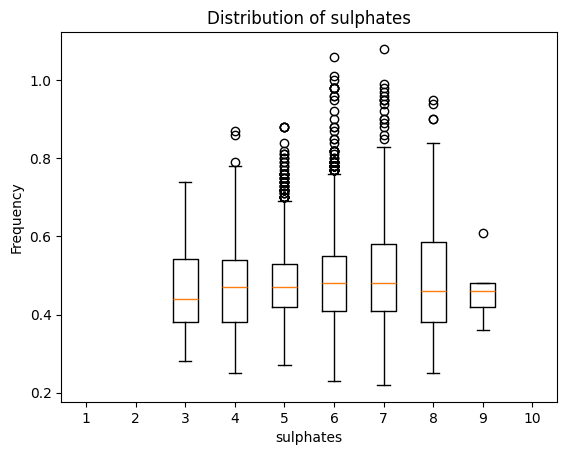

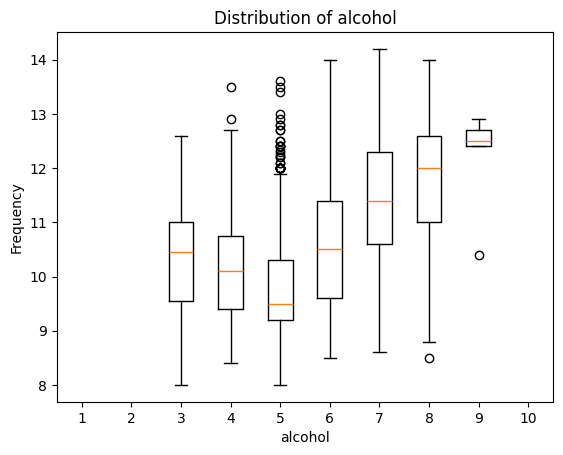

In [13]:
for label in white_wine.columns[:-1]:
    plt.boxplot([white_wine[white_wine["quality"]==i][label] for i in range(1,11)])
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()

We have decided to distinuish if a wine is good or bad based on if the quality score is higher or lower than 7.
1 = good wine
0 = bad wine

In [21]:
white_wine["quality"] = white_wine["quality"].apply(lambda x: 1 if x >= 7 else 0)

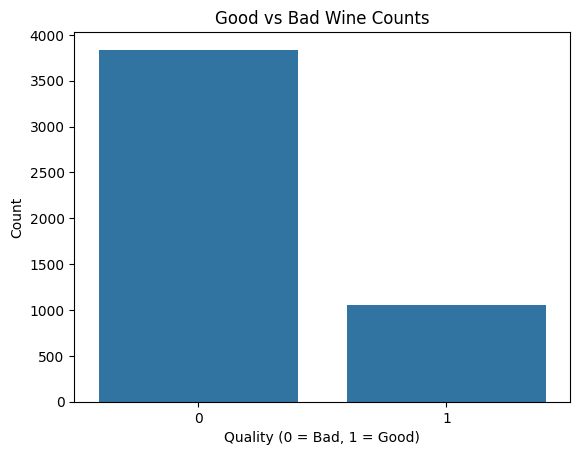

quality
0    3838
1    1060
Name: count, dtype: int64


In [17]:
sns.countplot(x='quality', data=white_wine)
plt.title('Good vs Bad Wine Counts')
plt.xlabel('Quality (0 = Bad, 1 = Good)')
plt.ylabel('Count')
plt.show()

print(white_wine['quality'].value_counts())

We can see that the dataset is unbalanced, we will look back at this later

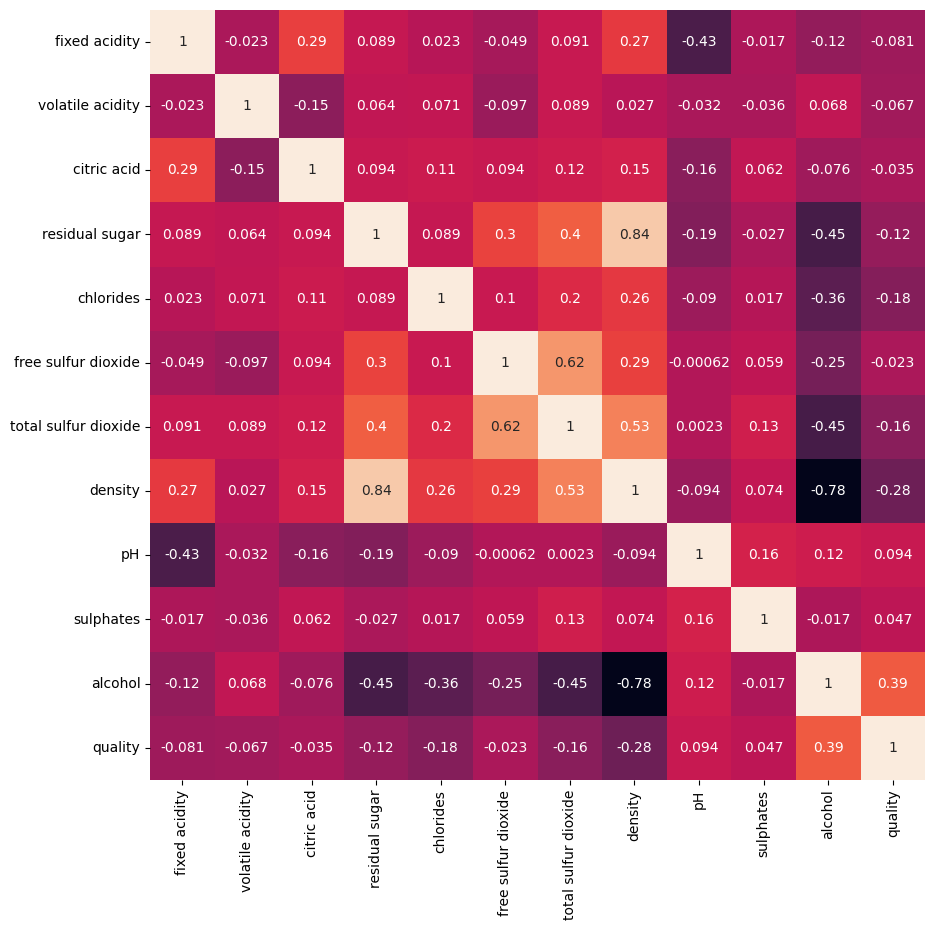

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(white_wine.corr(), annot=True, cbar=False)
plt.show()

In [ ]:
X = white_wine.drop("quality", axis=1)
y = white_wine["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



(3918, 11) (980, 11) (3918,) (980,)


Now lets train it an check the results

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       753
           1       0.85      0.63      0.72       227

    accuracy                           0.89       980
   macro avg       0.87      0.80      0.83       980
weighted avg       0.89      0.89      0.88       980



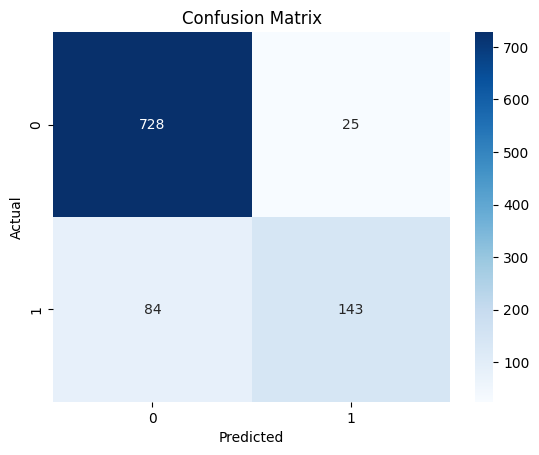

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test) 


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

From the confusion matrix we can se that it performs well on "bad" wines, but its not that great at classifying the good wines. This is likely because of the imbalance of good vs. bad wines. The model is biased towhards the bad wines as that results in a higher accuracy. We will now attempt to fix this by balancing the classes

In [36]:
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)

Now to check the new results

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       753
           1       0.84      0.59      0.70       227

    accuracy                           0.88       980
   macro avg       0.86      0.78      0.81       980
weighted avg       0.88      0.88      0.87       980



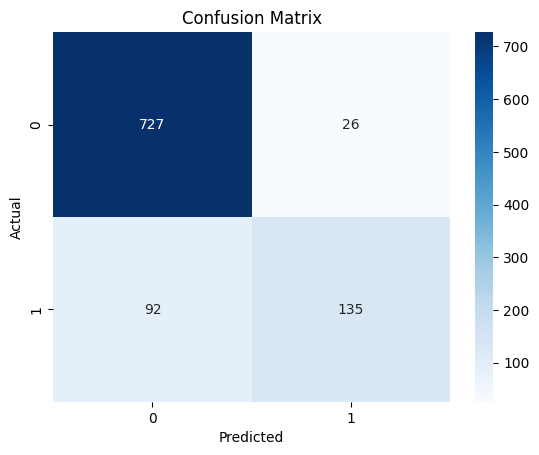

In [37]:
print(classification_report(y_test, y_pred_balanced))
cm = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This performed worse... 

Maybe its the good vs bad threshold? We'll try dividing it into 3 categories this time; bad (0), mid (1), good (2)

In [2]:
white_wine["quality"] = white_wine["quality"].apply(lambda x: 0 if x <=4 else (1 if x <=7 else 2))

X = white_wine.drop("quality", axis=1)
y = white_wine["quality"]

Now lets train a new RandomForrestClassifier

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_classifier_multi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_multi.fit(X_train, y_train)
y_pred_multi = rf_classifier_multi.predict(X_test)

Now for the new results

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        30
           1       0.96      1.00      0.98       915
           2       0.94      0.43      0.59        35

    accuracy                           0.95       980
   macro avg       0.90      0.56      0.65       980
weighted avg       0.95      0.95      0.94       980



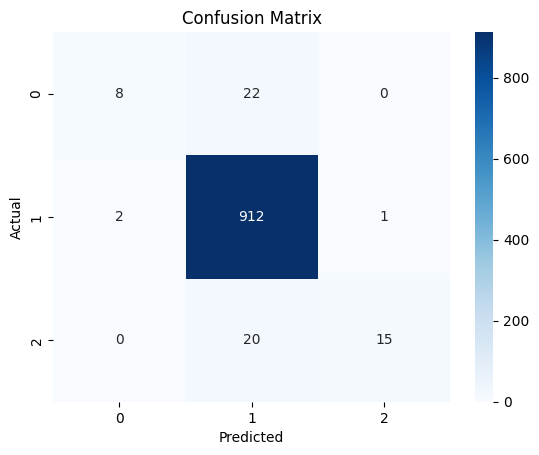

In [8]:
print(classification_report(y_test, y_pred_multi))
cm = confusion_matrix(y_test, y_pred_multi, labels=[0,1,2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bad